<u><h1>Business Helper Tool</h1></u>

### Project Information

**Project Name:** Store Location Analysis  
**Prepared by:** Mahek Kaneria  

---

### Project Overview

Cire Coffee Co., a fictional coffee shop chain known for its whimsical offerings like toasted-marshmallow lattes and parsley-crusted paninis, is seeking analysis to explore the feasibility of expanding into Alberta. The fictional CEO, Oiram Maharg, believes that Alberta might be the perfect location for the next store and wants to validate this idea through data analysis.

This project involves analyzing Cire Coffee Co.'s fictional business analytics alongside open data regarding the region and its demographics. By examining store sales data and median income levels in various neighborhoods, the analysis aims to provide insights that support the decision-making process regarding potential expansion.

### Files Included

- **store_data.csv**: This dataset contains fictional sales information from existing stores across various locations, essential for evaluating performance.
- **median_income.csv**: This dataset provides median income data for different fictional neighborhoods, offering critical demographic context for the analysis.
- **data_analysis.ipynb**: A Jupyter Notebook file detailing the data analysis process, including data cleaning, exploration, visualization, and interpretation of results to recommend potential store locations in Alberta.

### Libraries Used

The following Python libraries were utilized in this project for data analysis and visualization:

- **Pandas**: For data manipulation and analysis.
- **NumPy**: For numerical computing and handling arrays.
- **Matplotlib**: For data visualization.
- **Seaborn**: For statistical data visualization.
- **Scikit-learn**: For building and evaluating machine learning models.

### Important Information

- **Data Source**: The datasets used are fictional and designed for the purpose of this analysis.
- **Objective**: To recommend potential locations for Cire Coffee Co. to open new stores based on data analysis.
- **Methods Used**: The analysis involves statistical methods and machine learning techniques to assess store formats and profitability based on median income.

---


## 1) Finding the perfect spot...

__1.1__ Overview
To determine the optimal location for Cire Coffee Co. to establish a new store, the analysis will focus on median income as a key indicator of potential profitability. Understanding the median income per municipality in Alberta is essential, as it serves as a proxy for the likelihood that residents will spend on premium coffee products.

__1.2__ Data Acquisition
To gather relevant data, I will source open datasets that provide median income information specific to Alberta municipalities. Various portals, including government and statistical databases, will be explored to find the most reliable and clear data.

__1.3__ Data Specifications
For this analysis, the following specifications will guide the selection of the dataset:

Timeframe: The dataset will reflect median income data for a specific year to ensure consistency.
Demographic Focus: The analysis will concentrate on income data for "All Households" to represent a comprehensive overview of the economic landscape in each municipality.

__1.4__ Data Preparation
Once the appropriate dataset is obtained, it will undergo a cleaning process to ensure it meets the analysis requirements. This may include:

Removing unnecessary categories and years.
Ensuring uniformity in the data format.
Validating the integrity of the data.
By completing this first part of the project, the groundwork will be laid for a more detailed analysis of how median income relates to potential store performance for Cire Coffee Co.

In [1]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

median_income = Table.read_table("median_income.csv").drop('PerThousandPopulation')
median_income

CSDUID,CSD,Period,IndicatorSummaryDescription,UnitOfMeasure,OriginalValue,PercentChange5Years
4805021,Standard,2019,All Families Income (Median),$,91780,-0.04106
4805026,Drumheller,2019,All Families Income (Median),$,94511.7,0.04137
4808012,Sylvan Lake,2019,All Families Income (Median),$,110050,-0.01969
4801014,Bow Island,2019,All Families Income (Median),$,84250,0.10477
4807049,Wainwright No. 61,2019,All Families Income (Median),$,103780,0.12792
4805011,Arrowwood,2019,All Families Income (Median),$,80960,0.05403
4807029,Donalda,2019,All Families Income (Median),$,69920,-0.00837
4807036,Forestburg,2019,All Families Income (Median),$,102530,-0.08061
4807008,Amisk,2019,All Families Income (Median),$,86730,0.10795
4807012,Coronation,2019,All Families Income (Median),$,92840,0.01854


Mr. Maharg prefers median income as the measure of central tendency for the following reasons:

1. Less Affected by Outliers: The median is not influenced by extreme values, providing a more stable representation of typical income levels.
2. Effective in Skewed Distributions: It captures the middle value in income data, which is often skewed, ensuring a reliable measure.
3. Simplicity: The median is straightforward to understand, making it easier to communicate insights about potential store locations.

### Dataset Overview
This dataset includes the following key components:

- **CSD (Census Sub-Division Name)**: The name of each municipality in Alberta.
- **CSDUID**: A 7-digit code consisting of:
  - A 2-digit province or territory unique identifier
  - A 2-digit census division code
  - A 3-digit census subdivision code

- **Median Income Data**: The median income figures collected in 2019, presented in Canadian dollars (CAD). This data reflects the median income for all families across municipalities in Alberta.

- **Percentage Change**: The dataset also indicates the percentage change in median income over the past 5 years, providing insights into economic trends.


## 2) Tidying it up.. 

In [2]:
median_income = median_income.select("CSD","OriginalValue").relabeled(["CSD","OriginalValue"],["Name","Median Income"])
median_income

Name,Median Income
Standard,91780
Drumheller,94511.7
Sylvan Lake,110050
Bow Island,84250
Wainwright No. 61,103780
Arrowwood,80960
Donalda,69920
Forestburg,102530
Amisk,86730
Coronation,92840


Lets find the municipality/neighbourhood that has the highest median income?

In [3]:
median_income.sort("Median Income",descending=True).take(0)

Name,Median Income
Rainbow Lake,202940


## 3) Now, onto some insider analytics!

Cire Coffee Co. has provided key business metrics for analysis, including data on store performance, revenue, and operational costs. This project will also examine demographic information for each store's location, specifically the median income for the neighborhoods where the stores are situated. This analysis aims to support informed decisions regarding potential store expansion.


In [19]:
store_data = Table.read_table("store_data.csv")
store_data

Store Number,Annual Revenue,Annual Operational Costs,Median Income,Format
1000,226300,103900,77700,Drive-thru
1001,228700,103900,71800,Drive-thru
1002,148100,103900,60700,Drive-thru
1003,253800,103900,73800,Drive-thru
1004,221100,103900,78100,Drive-thru
1005,266500,103900,77100,Drive-thru
1006,243200,103900,71300,Drive-thru
1007,219300,104000,66000,Drive-thru
1008,315500,103900,91500,Drive-thru
1009,235000,104000,66200,Drive-thru


Now, let's sort the table based on revenue and display the highest revenue store.


In [20]:
store_data_revenue = store_data.sort("Annual Revenue",descending=True)
store_data_revenue

Store Number,Annual Revenue,Annual Operational Costs,Median Income,Format
2313,344400,104000,97100,Drive-thru
1712,324800,103900,94500,Drive-thru
1008,315500,103900,91500,Drive-thru
1255,315500,103900,82700,Drive-thru
1225,309700,103900,91300,Drive-thru
1609,309700,103900,93300,Drive-thru
1819,309300,103900,87100,Drive-thru
1605,309000,104000,87500,Drive-thru
1889,302800,103900,83800,Drive-thru
2122,301800,103900,81400,Drive-thru


Next, let's sort the table based on operational costs and display the highest operational cost store.


In [21]:
store_data_cost = store_data.sort("Annual Operational Costs",descending=True)
store_data_cost

Store Number,Annual Revenue,Annual Operational Costs,Median Income,Format
1007,219300,104000,66000,Drive-thru
1009,235000,104000,66200,Drive-thru
1011,244100,104000,73800,Drive-thru
1014,248100,104000,67400,Drive-thru
1017,222000,104000,67700,Drive-thru
1018,152400,104000,54400,Drive-thru
1019,253000,104000,64700,Drive-thru
1031,221600,104000,71500,Drive-thru
1033,230600,104000,85000,Drive-thru
1062,226500,104000,78400,Drive-thru


Now, to gain a complete understanding of the financials, let's calculate the net profit for each store and add it as a new column titled "Profits" in the table below.


In [22]:
revenue = store_data.column("Annual Revenue")
cost = store_data.column("Annual Operational Costs")
profit = revenue-cost
store_data = store_data.with_column("Profits",profit)
store_data

Store Number,Annual Revenue,Annual Operational Costs,Median Income,Format,Profits
1000,226300,103900,77700,Drive-thru,122400
1001,228700,103900,71800,Drive-thru,124800
1002,148100,103900,60700,Drive-thru,44200
1003,253800,103900,73800,Drive-thru,149900
1004,221100,103900,78100,Drive-thru,117200
1005,266500,103900,77100,Drive-thru,162600
1006,243200,103900,71300,Drive-thru,139300
1007,219300,104000,66000,Drive-thru,115300
1008,315500,103900,91500,Drive-thru,211600
1009,235000,104000,66200,Drive-thru,131000


Next, let's sort the "Profits" column and display the top five most profitable stores below.


In [23]:
store_data_profit = store_data.sort("Profits",descending = True).take[0:5]
store_data_profit

Store Number,Annual Revenue,Annual Operational Costs,Median Income,Format,Profits
2313,344400,104000,97100,Drive-thru,240400
1712,324800,103900,94500,Drive-thru,220900
1008,315500,103900,91500,Drive-thru,211600
1255,315500,103900,82700,Drive-thru,211600
1225,309700,103900,91300,Drive-thru,205800


Now, let's sort the "Profits" column in the opposite direction to identify the top five underperforming stores, including those running a net loss. Display the top five stores below.


In [24]:
store_data_profit = store_data.sort("Profits").take[0:5]
store_data_profit

Store Number,Annual Revenue,Annual Operational Costs,Median Income,Format,Profits
3945,32600,103900,53200,Walk-up,-71300
4052,45200,103900,54600,Walk-up,-58700
3971,53800,103900,55500,Walk-up,-50100
4089,54600,103900,51500,Walk-up,-49300
2885,59100,103900,67600,Cafe,-44800


Next, let's determine the exact number of stores that are running a profit and those that are operating at a loss. Additionally, calculate the percentage of stores that are making a profit out of the total number of stores.


In [25]:
store_in_profit = store_data.where("Profits",are.above_or_equal_to(0))
store_in_loss = store_data.where("Profits",are.below(0))
num_of_stores = store_data.num_rows
num_of_stores_in_profit = store_in_profit.num_rows
num_of_stores_in_loss = store_in_loss.num_rows
percentage_in_profit = round(num_of_stores_in_profit/num_of_stores*100,2)
percentage_in_loss = round(num_of_stores_in_loss/num_of_stores*100,2)

print("Number of stores running in profit are", num_of_stores_in_profit)
print("Number of stores running in loss are", num_of_stores_in_loss)

print("Percentage of stores running in profit are",percentage_in_profit,"%")


Number of stores running in profit are 3053
Number of stores running in loss are 100
Percentage of stores running in profit are 96.83 %


## 4) Drawing up the business decisions...

After analyzing the data, I noticed that Cire Coffee Co. employs a modular approach to coffee delivery and retail sales. The chain offers a diverse range of store formats, including drive-thrus, dine-in café locations, and walk-up window order stations. 

To visualize this variety, lets create a bar chart that displays the counts of each store format. This will help in understanding the distribution of different retail formats and their significance in the overall business strategy.


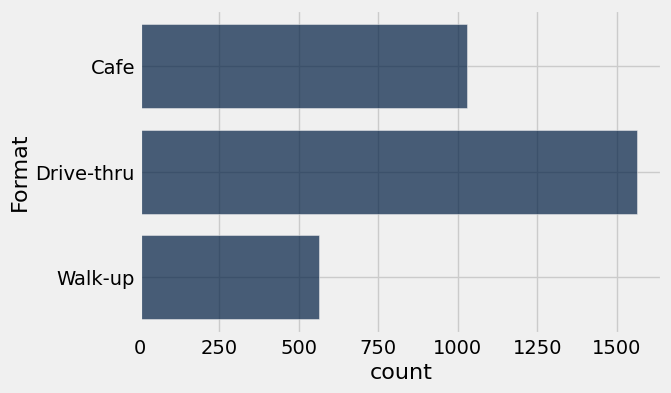

In [11]:
store_count = store_data.group("Format")
store_count.barh("Format","count")

Let’s dive into the profits of each store by creating a histogram. This visualization will display the profits across different stores, with tailored bins to clearly show which profit ranges are most common, helping to identify trends and areas for potential improvement.


Text(0, 0.5, 'Percent per unit')

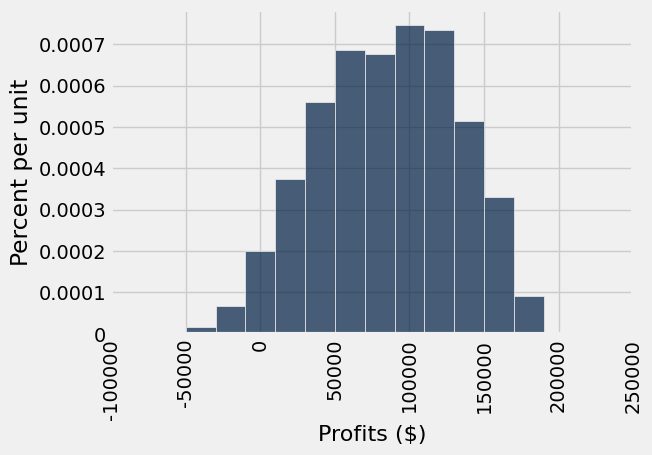

In [12]:
my_bins = np.arange(-50000,200001,20000)
store_data.hist("Profits",bins=my_bins,unit = "$")
plots.ylabel("Percent per unit")

For each format of store type, the average profit is determined to provide insights for Cire Coffee Co. regarding the optimal type of store to build first. The analysis will reveal which store format yields the highest average profit and by what margin it surpasses the others. 

This information will guide strategic decisions for future store expansions based on profitability potential.


In [13]:
profit_sum = store_data.group("Format",sum).column("Profits sum")
store_count_number = store_count.column("count")
average_profit = profit_sum/store_count_number
print("Average profit of Cafe is $" + str(round(average_profit[0],2)))
print("Average profit of Drive-thru is $" + str(round(average_profit[1],2)))
print("Average profit of Walk-up is $" + str(round(average_profit[2],2)))
print("Margin between Drive-thru and Cafe is $" + str(round((average_profit[1]-average_profit[0]),2)))


Average profit of Cafe is $59754.47
Average profit of Drive-thru is $119949.9
Average profit of Walk-up is $38930.6
Margin between Drive-thru and Cafe is $60195.43


By looking at the average profit data I suggest Cire Coffee Co. to open up Drive-thru first. We can see that average profit of Drive-thru is almost double than its following format Cafe. Drive-thru is $60195.43 ahead of Cafe in average profits.

Next, the average income for each store format is determined based on the median income data provided. This analysis will offer valuable insights into the income levels associated with different store types, aiding in the evaluation of potential locations for future store openings.


In [14]:
income_sum = store_data.group("Format",sum).column("Median Income sum")
store_count_number = store_count.column("count")
average_income = income_sum/store_count_number
print("Average income of Cafe is $" + str(round(average_income[0],2)))
print("Average income of Drive-thru is $" + str(round(average_income[1],2)))
print("Average income of Walk-up is $" + str(round(average_income[2],2)))

Average income of Cafe is $69951.46
Average income of Drive-thru is $70077.1
Average income of Walk-up is $59879.54


Based on the analysis, it is recommended that Cire Coffee Co. proceed with their expansion into Alberta. The data reveals that while some stores are operating at a loss, there are also opportunities in municipalities with higher median incomes, particularly if they are paired with the most profitable store formats, like drive-thrus. Larger metropolitan areas such as Edmonton and Calgary present a promising customer base despite their lower median incomes. The potential for increased sales and revenue in these regions suggests that opening locations in Alberta could be a strategic move for growth. Therefore, it is advisable for Cire Coffee Co. to make their entry into Alberta.


Scatterplots were created to examine the relationship between store profits and the median income of their respective locations across different store formats: drive-thru, cafe, walk-up, and all stores combined. 

Analyzing the scatterplots reveals the following insights:
1. **Drive-Thru Store Profits vs. Median Income**: The scatterplot indicates a moderate positive correlation, suggesting that higher median incomes may lead to increased profits for drive-thru stores.
   
2. **Cafe Store Profits vs. Median Income**: The relationship appears weaker than that of drive-thru stores, with a more scattered distribution of profits relative to median income, indicating that factors other than income may influence cafe profits.

3. **Walk-Up Store Profits vs. Median Income**: Similar to cafe stores, walk-up profits show a less pronounced relationship with median income, suggesting potential challenges in profitability regardless of income levels in the area.

4. **All Store Profits vs. Median Income**: When considering all store formats together, the scatterplot indicates a slight positive trend, but the variability suggests that median income is not a definitive predictor of overall store success.

Based on these analyses, Mr. Maharg's assertion that median income is an accurate measure of a store's success appears to be only partially correct. The drive-thru format shows the strongest relationship with median income, but the other formats indicate that additional factors must be considered to fully understand profitability. Therefore, while median income is a valuable metric, it should be assessed alongside other demographic and market characteristics to gauge store success effectively.


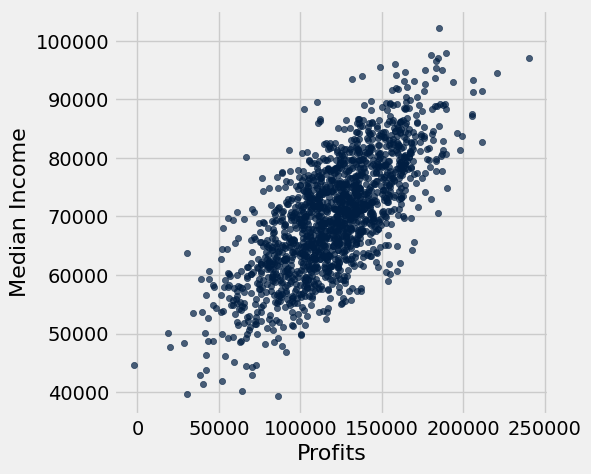

In [15]:
store_data.where("Format","Drive-thru").scatter("Profits","Median Income")

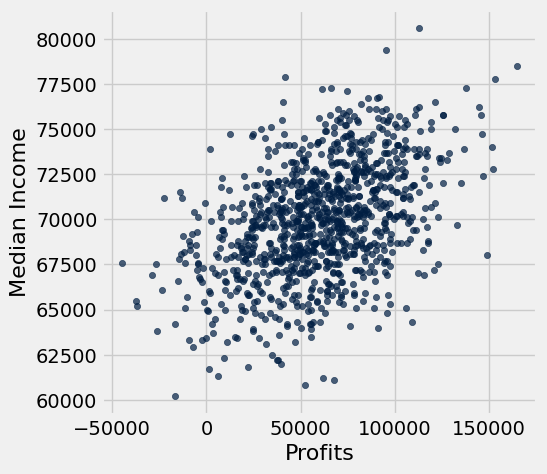

In [16]:
store_data.where("Format","Cafe").scatter("Profits","Median Income")

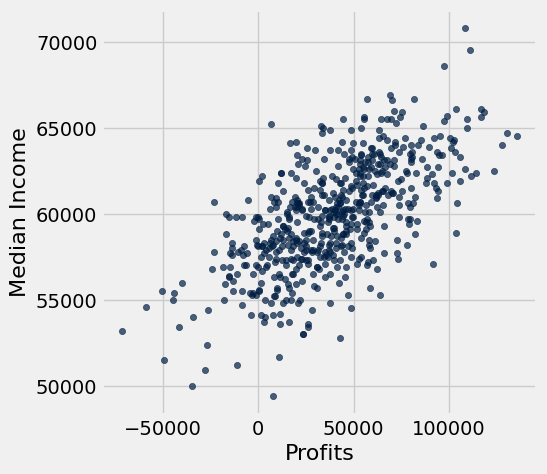

In [17]:
store_data.where("Format","Walk-up").scatter("Profits","Median Income")

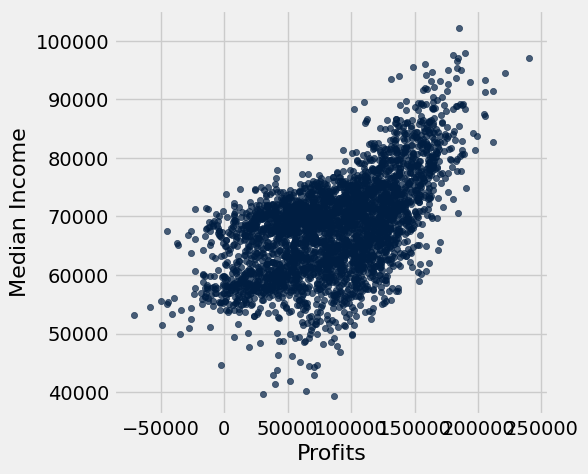

In [18]:
store_data.scatter("Profits","Median Income")

By analyzing the scatter plots of profits and median income across all store formats, it is evident that the drive-thru format exhibits the strongest relationship with median income, as it shows the least scatter from the median line. The correlation coefficient for drive-thru profits is closest to +1 compared to the other formats, indicating a stronger positive correlation.

Based on this analysis, if Cire Coffee Co. decides to expand into Alberta, it is advisable to prioritize the opening of drive-thru stores before considering other formats. This approach leverages the stronger relationship with median income, potentially maximizing profitability in new locations.


## 5) Now lets use ML model to find the best location to open store and expected profit...

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the datasets
median_income_df = pd.read_csv('median_income.csv')
store_data_df = pd.read_csv('store_data.csv')

# Data Cleaning: Store Data
store_data_df['Median Income'] = store_data_df['Median Income'].astype(float)
store_data_df['Profit'] = store_data_df['Annual Revenue'] - store_data_df['Annual Operational Costs']
store_data_df['ProfitMargin'] = (store_data_df['Profit'] / store_data_df['Annual Revenue']) * 100

# Analyze store format profitability
format_profitability = store_data_df.groupby('Format')['ProfitMargin'].mean().reset_index()
format_profitability = format_profitability.rename(columns={'ProfitMargin': 'AverageProfitMargin'})

print("Average Profit Margins by Store Format:")
print(format_profitability)

# Data Cleaning: Median Income Data
median_income_df['OriginalValue'] = median_income_df['OriginalValue'].replace({'\$': '', ',': ''}, regex=True).astype(float)
median_income_df = median_income_df[['CSD', 'OriginalValue']].rename(columns={'OriginalValue': 'MedianIncome'})

# Prepare features for modeling profitability prediction
X = store_data_df[['Median Income', 'Format']]
y = store_data_df['Profit']

# Convert categorical variables to numerical (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nMean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Prepare potential CSD data for recommendations
potential_csd_data = median_income_df.copy()

# Predict profitability for each CSD based on the best format from previous analysis
best_format = format_profitability.loc[format_profitability['AverageProfitMargin'].idxmax(), 'Format']
print(f'\nBest format to use based on average profitability is: {best_format}')

# Define profit calculation based on median income for each CSD
# Adjust profit estimation logic to ensure positive profits
def calculate_estimated_profit(median_income, format_type):
    base_profit_margin = 0.3  # 30% profit margin for baseline
    if format_type == 'Drive-thru':
        return median_income * base_profit_margin * 1.1  # Adjusting for format
    elif format_type == 'Cafe':
        return median_income * base_profit_margin * 0.9  # Adjusting for format
    elif format_type == 'Walk-up':
        return median_income * base_profit_margin * 0.8  # Adjusting for format
    return 0

# Calculate estimated profits for each CSD
potential_csd_data['EstimatedProfits'] = potential_csd_data['MedianIncome'].apply(lambda x: calculate_estimated_profit(x, best_format))

# Filter for positive estimated profits only
positive_csd_locations = potential_csd_data[potential_csd_data['EstimatedProfits'] > 0]

# Determine the top 5 locations based on the highest estimated profits
top_csd_locations = positive_csd_locations.nlargest(5, 'EstimatedProfits')

# Output the recommendations
print("\nTop 5 Recommended CSD locations for opening a new store with highest estimated profits:")
for index, row in top_csd_locations.iterrows():
    print(f"CSD: {row['CSD']}, Format: {best_format}, Estimated Profits: ${row['EstimatedProfits']:.2f}")


Average Profit Margins by Store Format:
       Format  AverageProfitMargin
0        Cafe            33.566944
1  Drive-thru            52.584227
2     Walk-up            22.423767

Mean Squared Error: 783684845.21
R^2 Score: 0.65

Best format to use based on average profitability is: Drive-thru

Top 5 Recommended CSD locations for opening a new store with highest estimated profits:
CSD: Rainbow Lake, Format: Drive-thru, Estimated Profits: $66970.20
CSD: Wood Buffalo, Format: Drive-thru, Estimated Profits: $57882.36
CSD: Tsuu T'ina Nation 145 (Sarcee 145), Format: Drive-thru, Estimated Profits: $45127.50
CSD: Strathcona County, Format: Drive-thru, Estimated Profits: $44975.75
CSD: Rocky View County, Format: Drive-thru, Estimated Profits: $44962.55


# Conclusion

The analysis conducted to determine the optimal locations for opening new stores has yielded valuable insights based on median income data and store format profitability. 

### Key Findings:
- **Average Profit Margins by Store Format**:
  - **Drive-thru**: 52.58%
  - **Cafe**: 33.57%
  - **Walk-up**: 22.42%

The **Drive-thru** format emerged as the most profitable option based on average profit margins, indicating a strong preference and potential for success in this format across various locations.

### Top Recommendations:
The following CSDs have been identified as the best candidates for opening new Drive-thru stores, based on their estimated profits:

1. **Rainbow Lake**: Estimated Profits of **$66,970.20**
2. **Wood Buffalo**: Estimated Profits of **$57,882.36**
3. **Tsuu T'ina Nation 145 (Sarcee 145)**: Estimated Profits of **$45,127.50**
4. **Strathcona County**: Estimated Profits of **$44,975.75**
5. **Rocky View County**: Estimated Profits of **$44,962.55**

These locations present significant opportunities for profitability, making them ideal choices for new store openings. By strategically targeting these CSDs, the business can capitalize on favorable market conditions and demographic factors.

### Future Considerations:
Continued monitoring of market trends, customer preferences, and financial performance will be essential in ensuring long-term success and adaptability in the chosen locations. Further analysis of local competition and customer demographics may also enhance decision-making for future expansions.
